In [3]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import time
start = time.time()


In [10]:
import tensorflow.keras,os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers , layers, applications

In [12]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [13]:
SIZE = 256  #Resize images

In [14]:

# for feqature extractions
train_images = []
train_labels = []

In [15]:
Image_Width=224
Image_Height=224
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [16]:
from google.colab import drive

In [17]:
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Upload data and unzip
from zipfile import ZipFile

file_name = "/content/drive/MyDrive/Autism/data/archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [19]:
filenames = os.listdir("/content/AutismDataset/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(1)
    else:
        categories.append(0)

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [20]:
filenames = os.listdir("/content/AutismDataset/test")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(1)
    else:
        categories.append(0)

test_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [21]:
train_df.head()

,filename,category
0,Non_Autistic.169.jpg,0
1,Non_Autistic.1234.jpg,0
2,Non_Autistic.1056.jpg,0
3,Autistic.70.jpg,1
4,Non_Autistic.691.jpg,0


In [22]:
train_df.tail()

,filename,category
2535,Non_Autistic.106.jpg,0
2536,Non_Autistic.1267.jpg,0
2537,Non_Autistic.709.jpg,0
2538,Autistic.329.jpg,1
2539,Non_Autistic.557.jpg,0


In [23]:
test_df.tail()


,filename,category
295,Non_Autistic.51.jpg,0
296,Non_Autistic.139.jpg,0
297,Autistic.100.jpg,1
298,Autistic.34.jpg,1
299,Non_Autistic.106.jpg,0


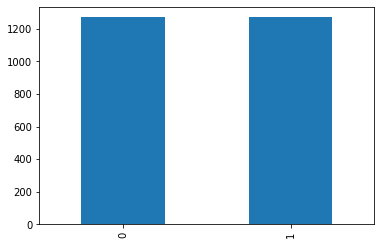

In [24]:
train_df['category'].value_counts().plot.bar()

In [25]:
train_df["category"] = train_df["category"].replace({0: 'non_autistic', 1: 'autistic'}) 

In [26]:
test_df["category"] = test_df["category"].replace({0: 'non_autistic', 1: 'autistic'}) 

In [27]:
num_classes = 2

In [28]:
# Imports para manipulação e visualização de dados
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Imports para manipulação de imagens
import os 
import sklearn
from PIL import Image
from sklearn.model_selection import train_test_split

# Imports para cálculo de métricas e utilitários
import itertools
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Imports para Deep Learning
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical

#from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input

# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

%matplotlib inline

In [ ]:
for directory_path in glob.glob(r'D:\shapna\Autism\data\train\*'):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

Autistic
D:\shapna\Autism\data\train\Autistic\0001.jpg
D:\shapna\Autism\data\train\Autistic\0002.jpg
D:\shapna\Autism\data\train\Autistic\0003.jpg
D:\shapna\Autism\data\train\Autistic\0004.jpg
D:\shapna\Autism\data\train\Autistic\0005.jpg
D:\shapna\Autism\data\train\Autistic\0006.jpg
D:\shapna\Autism\data\train\Autistic\0007.jpg
D:\shapna\Autism\data\train\Autistic\0008.jpg
D:\shapna\Autism\data\train\Autistic\0009.jpg
D:\shapna\Autism\data\train\Autistic\0010.jpg
D:\shapna\Autism\data\train\Autistic\0011.jpg
D:\shapna\Autism\data\train\Autistic\0012.jpg
D:\shapna\Autism\data\train\Autistic\0013.jpg
D:\shapna\Autism\data\train\Autistic\0014.jpg
D:\shapna\Autism\data\train\Autistic\0015.jpg
D:\shapna\Autism\data\train\Autistic\0016.jpg
D:\shapna\Autism\data\train\Autistic\0017.jpg
D:\shapna\Autism\data\train\Autistic\0018.jpg
D:\shapna\Autism\data\train\Autistic\0019.jpg
D:\shapna\Autism\data\train\Autistic\0020.jpg
D:\shapna\Autism\data\train\Autistic\0021.jpg
D:\shapna\Autism\data\tra

In [ ]:
train_images

[array([[[245, 244, 242],
         [244, 243, 241],
         [243, 242, 240],
         ...,
         [249, 255, 255],
         [249, 255, 255],
         [249, 255, 255]],
 
        [[245, 244, 242],
         [244, 243, 241],
         [244, 243, 241],
         ...,
         [249, 255, 255],
         [249, 255, 255],
         [249, 255, 255]],
 
        [[245, 244, 242],
         [244, 243, 241],
         [244, 243, 241],
         ...,
         [249, 255, 255],
         [249, 255, 255],
         [249, 255, 255]],
 
        ...,
 
        [[209, 219, 200],
         [179, 207, 221],
         [161, 209, 251],
         ...,
         [246, 244, 156],
         [246, 243, 163],
         [246, 242, 169]],
 
        [[192, 206, 197],
         [170, 202, 221],
         [154, 203, 249],
         ...,
         [244, 242, 157],
         [242, 240, 157],
         [241, 238, 158]],
 
        [[181, 201, 204],
         [167, 202, 231],
         [153, 206, 254],
         ...,
         [246, 244, 156],
  

In [ ]:
train_labels

['Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',

In [ ]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
# Capture test/validation data and labels into respective lists
test_images = []
test_labels = [] 
for directory_path in glob.glob(r'D:\shapna\Autism\data\test\*'):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

In [ ]:
#Convert lists to arrays        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

###################################################################
# Normalize pixel values to between 0 and 1
# convert from integers to floats

x_train = x_train.astype('float32')
# normalize to the range 0-1
x_train /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (x_train.min(), x_train.max()))

x_test = x_test.astype('float32')
# normalize to the range 0-1
x_test/= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (x_test.min(), x_test.max()))
#One hot encode y values for neural network. 
# from keras.utils import to_categorical
# y_train_one_hot = to_categorical(y_train)
# y_test_one_hot = to_categorical(y_test)


Min: 0.000, Max: 1.000
Min: 0.000, Max: 1.000


In [ ]:
x_test.shape

(280, 256, 256, 3)

In [ ]:

#############################
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:

import time
start = time.time()
#Now, let us use features from convolutional network for RF
feature_extractor = VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features #This is our X input to RF

#RANDOM FOREST
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
end = time.time()
print("Run time [s]: ",end-start)

In [2]:
!pip install xgboost  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import time
start = time.time()
#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_for_training, y_train) #For sklearn no one hot encoding

end = time.time()
print("Run time [s]: ",end-start)

C:\Users\User\.conda\envs\leukemia\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)




In [ ]:
#Now predict using the trained RF model. 
prediction = model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

In [ ]:


#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))







Accuracy =  0.9142857142857143


The prediction for this image is:  ['Non_Autistic']
The actual label for this image is:  Non_Autistic


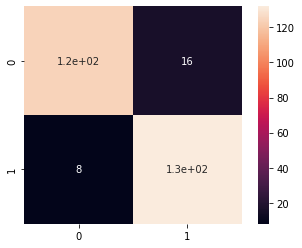

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])
